## **Importing Liberaries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/modyreturn/Health_Care_Analysis/refs/heads/master/merged_data.csv"

df = pd.read_csv(url)

df.head()


,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
2,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,9-12 Months,1,Inpatient,Other
3,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other
4,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other


## **Cleaning The Data**

In [2]:
# converting Archive_Date to datetime
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month_Name'] = df['Archive_Date'].dt.month_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Archive_Date     452991 non-null  datetime64[ns]
 1   Specialty_HIPE   452800 non-null  float64       
 2   Specialty_Name   452991 non-null  object        
 3   Adult_Child      452991 non-null  object        
 4   Age_Profile      452816 non-null  object        
 5   Time_Bands       452989 non-null  object        
 6   Total            452991 non-null  int64         
 7   Case_Type        452991 non-null  object        
 8   Specialty Group  452991 non-null  object        
 9   Year             452991 non-null  int32         
 10  Month_Name       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 36.3+ MB


In [3]:
df['Time_Bands'] = df['Time_Bands'].str.strip()
df['Age_Profile'] = df['Age_Profile'].str.strip()

In [4]:
# I will use the following func to format the values on axis of the charts as needed
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)

In [5]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## **Exploratory Data Analysis (EDA):**

### **Statistic Summary**

In [6]:
# using describe() to get statistic summary for the data
df.describe(include=('all'))

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group,Year,Month_Name
count,452991,452800.000000,452991,452991,452816,452989,452991.000000,452991,452991,452991.000000,452991
unique,NaN,NaN,78,3,3,8,NaN,3,27,NaN,12
top,NaN,NaN,General Surgery,Adult,16-64,0-3 Months,NaN,Outpatient,General,NaN,March
freq,NaN,NaN,43634,368151,203354,93818,NaN,270281,76614,NaN,47110
mean,2019-09-09 18:57:46.892720640,2619.144576,NaN,NaN,NaN,NaN,54.390059,NaN,NaN,2019.181778,NaN
min,2018-01-31 00:00:00,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2018.000000,NaN
25%,2018-10-31 00:00:00,1300.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2018.000000,NaN
50%,2019-08-31 00:00:00,1900.000000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,2019.000000,NaN
75%,2020-06-30 00:00:00,2600.000000,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,2020.000000,NaN
max,2021-03-31 00:00:00,9000.000000,NaN,NaN,NaN,NaN,4239.000000,NaN,NaN,2021.000000,NaN


### **Specialty Analysis:**
-   Let's se what is the top 10 specialties in the dataset:

In [7]:
#specialty_df = df.groupby(['Specialty_Name', 'Case_Type'])['Total'].sum().reset_index()
specialty_df = df.groupby('Specialty_Name')['Total'].sum().reset_index().head(10).sort_values(by='Total', ascending=False)

specialty_df

,Specialty_Name,Total
4,Cardiology,1100604
2,Breast Surgery,156736
8,Clinical Immunology,128125
7,Clinical (Medical) Genetics,109024
1,Anaesthetics,78000
9,Clinical Neurophysiology,56326
3,Cardio-Thoracic Surgery,31037
0,Accident & Emergency,6004
5,Chemical Pathology,2891
6,Child/Adolescent Psychiatry,2391


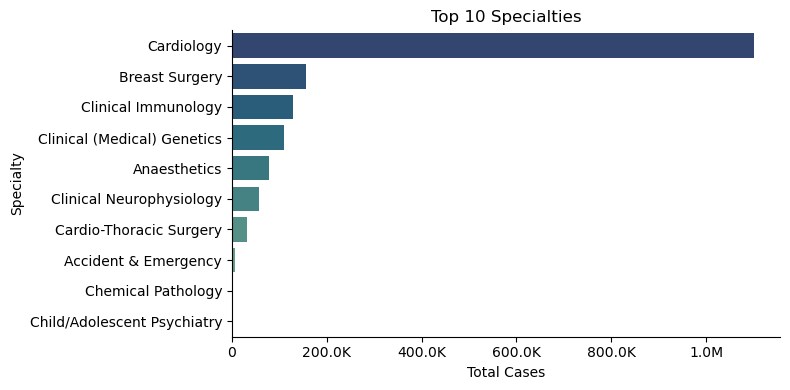

In [8]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=specialty_df,
    y='Specialty_Name',
    x='Total',
    palette='crest_r'
)

# function to format the values on the yaxis
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Specialties')
plt.xlabel('Total Cases')
plt.ylabel('Specialty')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights**

-   Cardiology:
    - Dominates the chart with **over 1 million cases**.
    - Indicates high demand for heart-related services.
    - Suggests the need for continued investment in **cardiac care infrastructure and staff**.

-   Breast Surgery & Clinical Immunology:
    - Each has over **100K cases**.
    - Reflects strong demand in **oncology and immune-related conditions**.

-   Clinical (Medical) Genetics:
    - High volume indicates rising interest in **genomic medicine**.

-   Anaesthetics & Clinical Neurophysiology:
    - Essential support specialties with **significant case volumes**.
    - Central to surgical and neurological diagnostic care.

-   Cardio-Thoracic Surgery
    - Lower in volume than Cardiology, likely due to its **specialized nature**.

-   Accident & Emergency
    - Lower than expected—possibly due to data scope or triage protocols.

-   Chemical Pathology & Child/Adolescent Psychiatry
    - Critical for diagnostics and mental health support.
    - Smaller totals, but still among the top 10.

---


In [9]:
specialty_group = df.groupby('Specialty Group')['Total'].sum().reset_index().head(10).sort_values(by='Total', ascending=False)
specialty_group.head(5)


,Specialty Group,Total
1,Bones,3872040
8,ENT,3164343
9,Eyes,2018252
2,Brain,1159445
5,Cosmetic,769540


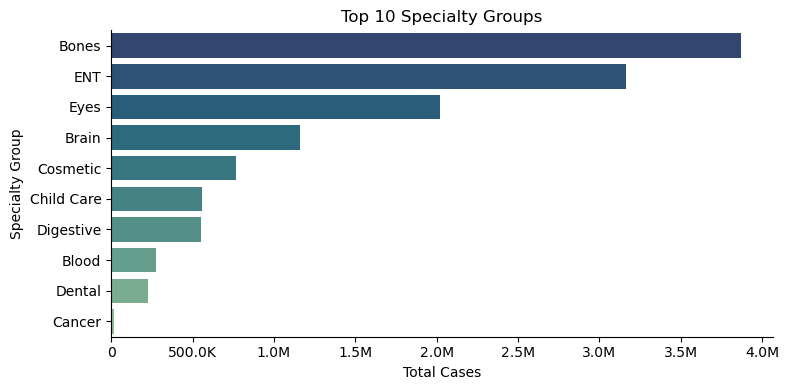

In [10]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=specialty_group,
    y='Specialty Group',
    x='Total',
    palette='crest_r'
)

# formatting the xaxis values
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Specialty Groups')
plt.xlabel('Total Cases')
plt.ylabel('Specialty Group')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights**

1. Bones
    - **Highest total cases**, approaching **4 million**.
    - Indicates high demand for **orthopedic services**, likely due to aging populations or injury recovery needs.

2. ENT (Ear, Nose, Throat)
    - Second highest, with **over 3 million cases**.
    - Reflects widespread and frequent ENT conditions across all age groups.

3. Eyes
    - Nearly **2 million cases**.
    - Emphasizes the importance of **ophthalmologic care**, possibly including cataracts, vision correction, and screenings.

4. Brain
    - Around **1.3 million cases**.
    - Points to a strong volume in **neurology and neurosurgery**.

5. Cosmetic
    - Over **800K cases**, indicating **high elective demand** for aesthetic procedures.

6. Child Care
    - Close to Cosmetic in volume, showing ongoing focus on **pediatric care**.

7. Digestive
    - Over **600K cases**.
    - Suggests steady attention to **gastrointestinal health**.

8. Blood
    - Moderate volume (~400K), consistent with **hematology and related diagnostics**.

9. Dental
    - Slightly behind Blood.
    - Shows measurable demand for **oral health services**.

10. Cancer
    - Although lowest in this top 10, still significant.
    - May reflect data capture limits or separation into specific subspecialties (e.g., oncology types).

---

### **Month over Month (MoM) &Year over Year (YoY) % Change in Cases:**

-   Let's create a Monthly Summary:
    -   We’ll sum Total per month, so we can compare either month-over-month or year-over-year:

In [11]:
monthly_cases = df.groupby('Month_Name')['Total'].sum().reset_index()

# Calculate the percentage change month-over-month
monthly_cases['MoM_change_%'] = (monthly_cases['Total'].pct_change() * 100 ).round(2)
monthly_cases['MoM_change_%'] = monthly_cases['MoM_change_%'].fillna(0)  # Fill NaN values with 0 for the first month
monthly_cases['Month_Name'] = monthly_cases['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters
# month_order was defined earlier in the code
# here you can categorise and order Month_Name to plot
monthly_cases['Month_Name'] = pd.Categorical(monthly_cases['Month_Name'], categories=month_order, ordered=True)


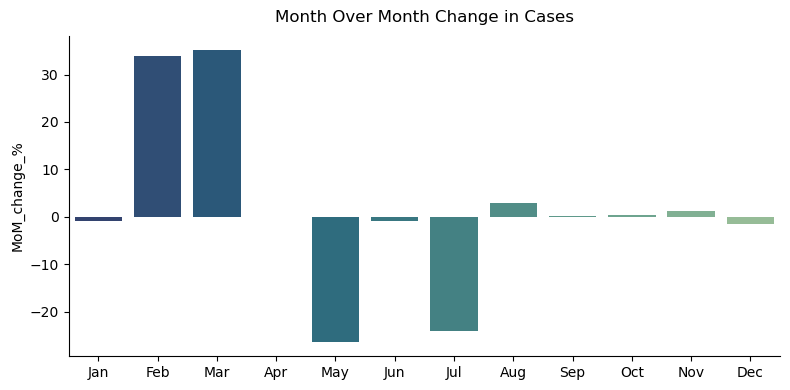

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=monthly_cases,
    x='Month_Name',
    y='MoM_change_%',
    palette='crest_r'
)

plt.title('Month Over Month Change in Cases', pad=10)
plt.xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

**Month-Over-Month (MoM) Change in Total Cases**

-   This bar chart shows the **percentage change in total cases** compared to the previous month.

- **February & March**:  
  - Over **+30% growth** each month.  
  - Indicates a **sharp surge in cases** during late Q1.

- **May & July**:
  - **-25%** MoM drop in both months.
  - Possibly due to system delays, seasonal effects, or fewer operational days.

- **August–December**:
  - Fluctuations become **minimal**, mostly between **-2% and +3%**.
  - Suggests a **steady state** of case volume entering the final quarter.

---

In [13]:
yearly_cases = df.groupby('Year')['Total'].sum().reset_index()
yearly_cases['YoY_change_%'] = (yearly_cases['Total'].pct_change() * 100 ).round(2)
yearly_cases['Year'] = yearly_cases['Year'].astype(str)  # Convert Year to string for better x-axis labels
yearly_cases['YoY_change_%'] = yearly_cases['YoY_change_%'].fillna(0)  # Fill NaN values with 0 for the first year


yearly_cases

,Year,Total,YoY_change_%
0,2018,7036731,0.00
1,2019,7495574,6.52
2,2020,7984923,6.53
3,2021,2120979,-73.44


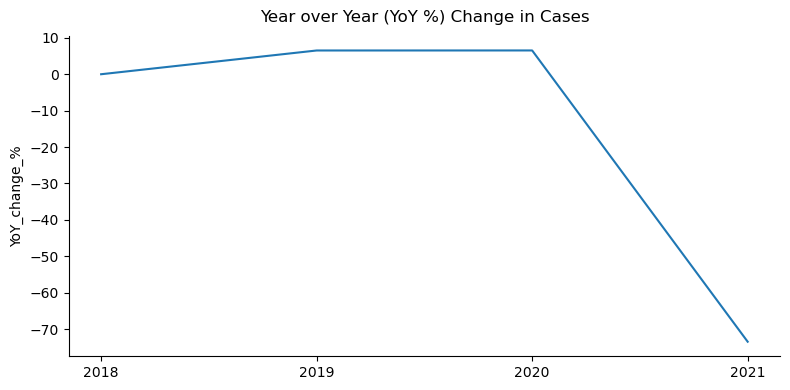

In [14]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=yearly_cases,
    x='Year',
    y='YoY_change_%',
    palette='crest_r'
)

plt.title('Year over Year (YoY %) Change in Cases', pad=10)
plt.xlabel('')

sns.despine()
plt.tight_layout()
plt.show()


**### **Insights**

-   **General Trend**
    - The YoY percentage change in cases starts at a relatively stable level around **0%** in 2018.
    - From 2018 to 2019, there is a slight increase, reaching a peak of approximately **+10%** in 2019.
    - In 2020, the trend reverses sharply, with a significant decline in the YoY percentage change.
    - By 2021, the YoY percentage change drops dramatically to around **-70%**, indicating a substantial decrease in cases compared to the previous year.

-   **Key Observations**
    - **Peak Growth in 2019**: The positive growth of about **+10%** indicates a notable increase in cases compared to the previous year.
    - **Sharp Decline in 2020**: The transition from a positive to a negative percentage change signifies a sudden drop in cases. This could be attributed to external factors such as changes in reporting, interventions, or other contextual events.
    - **Dramatic Drop in 2021**: The steep decline to **-70%** highlights an unprecedented reduction in cases compared to 2020. This could reflect the impact of measures like lockdowns, vaccinations, or behavioral changes.
